In [1]:
import matplotlib.pyplot as plt  # Graphics
import matplotlib.patches as mpatches
from matplotlib import colors
import seaborn  # Graphics
import pandas as pd # Tabular data manipulation
import rioxarray  # Surface data manipulation
import xarray  # Surface data manipulation
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles
import geopandas as gpd  # Spatial data manipulation

import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

E:\Uni\research\venv\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
E:\Uni\research\venv\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [10]:
state = "STE_2021_AUST_SHP_GDA2020/STE_2021_AUST_GDA2020.shp"
state = gpd.read_file(state)
state = state.loc[state.is_valid]
state['STE_CODE21']=state['STE_CODE21'].astype(int)

In [17]:
wages_path = 'wages2020Q1.xlsx'

wages_2020_Q1 = pd.read_excel(wages_path, engine='openpyxl')
wages_2020_Q1 = pd.DataFrame(wages_2020_Q1)
wages_2020_Q1['STE_CODE21']=wages_2020_Q1['STE_CODE21'].astype(int)

wages_path = 'wages2021Q1.xlsx'

wages_2021_Q1 = pd.read_excel(wages_path, engine='openpyxl')
wages_2021_Q1 = pd.DataFrame(wages_2021_Q1)
wages_2021_Q1['STE_CODE21']=wages_2021_Q1['STE_CODE21'].astype(int)

wages_path = 'wages2022Q1.xlsx'

wages_2022_Q1 = pd.read_excel(wages_path, engine='openpyxl')
wages_2022_Q1 = pd.DataFrame(wages_2022_Q1)
wages_2022_Q1['STE_CODE21']=wages_2022_Q1['STE_CODE21'].astype(int)

In [18]:
state_wages_2020_Q1 = state.merge(wages_2020_Q1, on='STE_CODE21', how='left')
state_wages_2020_Q1 = state_wages_2020_Q1.set_index('STE_CODE21')
state_wages_2020_Q1 =state_wages_2020_Q1.iloc[:7]


state_wages_2021_Q1 = state.merge(wages_2021_Q1, on='STE_CODE21', how='left')
state_wages_2021_Q1 = state_wages_2021_Q1.set_index('STE_CODE21')
state_wages_2021_Q1 =state_wages_2021_Q1.iloc[:7]


state_wages_2022_Q1 = state.merge(wages_2022_Q1, on='STE_CODE21', how='left')
state_wages_2022_Q1 = state_wages_2022_Q1.set_index('STE_CODE21')
state_wages_2022_Q1 =state_wages_2022_Q1.iloc[:7]

In [19]:
list_color = ['grey','sandybrown','sandybrown','yellow',
              'navajowhite','lightgreen','lime','limegreen',
              'forestgreen','green','darkgreen','teal',
              'mediumaquamarine','lightseagreen','lightskyblue']

list_label = ['0-3', '4-5', '6-10', '11-15',
              '16-20', '21-50', '51-80', '81-120',
              '121-160', '161-200','201-300','301-500',
              '501-700','701-900','901-1200']

all_patches = []
for h,l in zip(list_color, list_label):
    patch = mpatches.Patch(color=h, label=l)
    all_patches.append(patch)

In [20]:
# plt.figure(figsize = (22,10))

# plt.subplot(2,4,i+1)
# state_wages_2020_Q1.plot(
#     figsize=(12, 24),
#     column="actual_change",
#     scheme="Quantiles",
#     k = 4,
#     cmap="GnBu",
#     edgecolor="grey",
#     legend=True,
# ).axis("off");

# plt.title("Change in WPI (dWPI/dt) 2020 Q3 in Australia") 


In [21]:
# state_wages_2020_Q1.plot(
#     figsize=(12, 24),
#     column="predicted_change",
#     scheme="Quantiles",
#     k = 4,
#     cmap="GnBu",
#     edgecolor="grey",
#     legend=True
# ).axis("off");

E:\Uni\research\venv\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
E:\Uni\research\venv\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
E:\Uni\research\venv\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


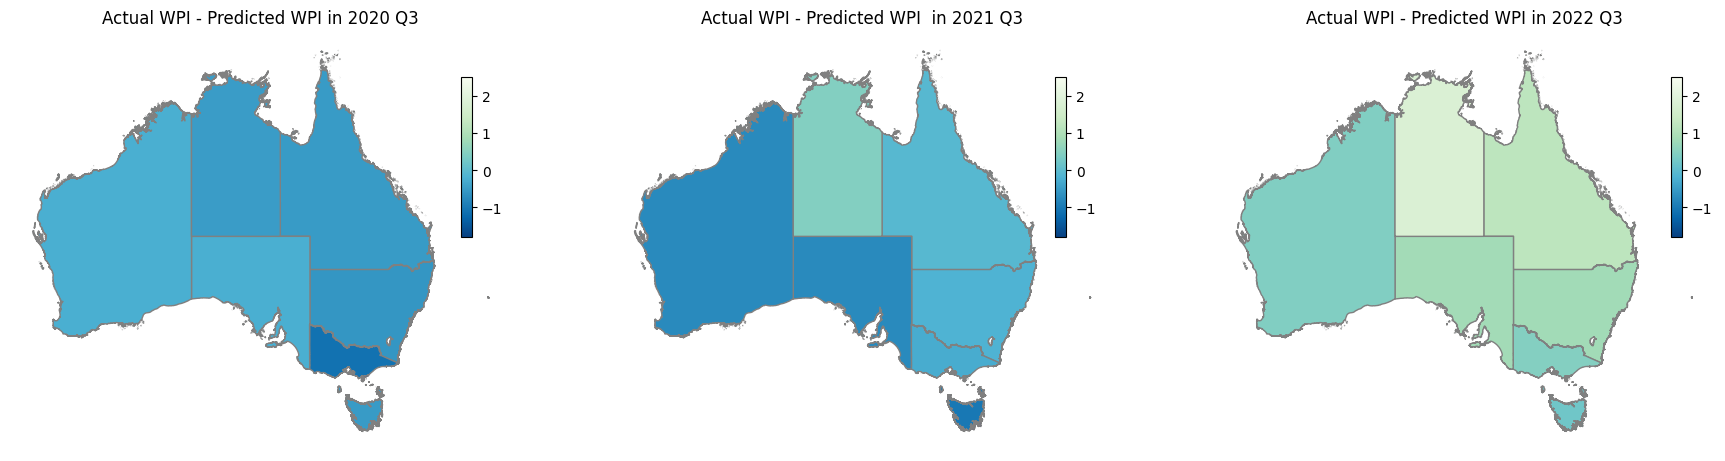

In [55]:

vmin = -1.8  # Set your minimum value
vmax = 2.5  # Set your maximum value

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 8), sharex=True)
ax1 = ax=axes[0]
ax2 = ax=axes[1]
ax3 = ax=axes[2]

# Create and customize your first plot
state_wages_2020_Q1.plot(
    column="change_diff",
    cmap="GnBu_r",
    edgecolor="grey",
    vmin=vmin,
    vmax=vmax,
    ax=axes[0]  # Assign the first subplot
)
axes[0].set_title("Actual WPI - Predicted WPI in 2020 Q3")
axes[0].set_axis_off()


cax0 = fig.add_axes([0.33, 0.5, 0.005, 0.2])  # Adjust position and size of the colorbar for Plot 1
sm0 = plt.cm.ScalarMappable(cmap="GnBu_r", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm0._A = []  # Fake up the array
cbar0 = plt.colorbar(sm0, cax=cax0)



# Create and customize your first plot
state_wages_2021_Q1.plot(
    column="change_diff",
    cmap="GnBu_r",
    edgecolor="grey",
    vmin=vmin,
    vmax=vmax,
    ax=axes[1]  # Assign the first subplot
)
axes[1].set_title("Actual WPI - Predicted WPI  in 2021 Q3")
axes[1].set_axis_off()

cax1 = fig.add_axes([0.6, 0.5, 0.005, 0.2])  # Adjust position and size of the colorbar for Plot 2
sm1 = plt.cm.ScalarMappable(cmap="GnBu_r", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm1._A = []  # Fake up the array
cbar1 = plt.colorbar(sm1, cax=cax1)



# Create and customize your first plot
state_wages_2022_Q1.plot(
    column="change_diff",
    cmap="GnBu_r",
    edgecolor="grey",
    vmin=vmin,
    vmax=vmax,
    ax=axes[2]  # Assign the first subplot
)
axes[2].set_title("Actual WPI - Predicted WPI in 2022 Q3")
axes[2].set_axis_off()


cax2 = fig.add_axes([0.88, 0.5, 0.005, 0.2])  # Adjust position and size of the colorbar for Plot 1
sm2 = plt.cm.ScalarMappable(cmap="GnBu_r", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm2._A = []  # Fake up the array
cbar2 = plt.colorbar(sm2, cax=cax2)



plt.colorbar(sm, cax=cax)
plt.savefig('spatial shift.png')
plt.show()




In [13]:
# state_wages_2020_Q1.plot(
#     figsize=(12, 24),
#     column="actual",
#     scheme="Quantiles",
#     k = 4,
#     cmap="GnBu",
#     edgecolor="grey",
#     legend=True
# ).axis("off");

In [14]:
# state_wages_2020_Q1.plot(
#     figsize=(12, 24),
#     column="predicted_actual",
#     scheme="Quantiles",
#     k = 4,
#     cmap="GnBu",
#     edgecolor="grey",
#     legend=True
# ).axis("off");

In [63]:
# state_wages_2020_Q1.plot(
#     figsize=(12, 24),
#     column="actual_change",
#     scheme="Quantiles",
#     k = 4,
#     cmap="GnBu",
#     edgecolor="grey",
#     legend=True
# ).axis("off");

In [13]:
wq =  lps.weights.Queen.from_dataframe(state_wages_2020_Q1)

wq.transform = 'r'


change_diff = state_wages_2020_Q1['change_diff']
ylag = lps.weights.lag_spatial(wq, change_diff)


('WARNING: ', 5, ' is an island (no neighbors)')


E:\Uni\research\venv\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 5.
  warnings.warn(message)


In [14]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)
print(ylagq5)

Quantiles

   Interval      Count
----------------------
[-0.62, -0.56] |     2
(-0.56, -0.43] |     1
(-0.43, -0.39] |     1
(-0.39, -0.34] |     1
(-0.34,  0.00] |     2


E:\Uni\research\venv\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
E:\Uni\research\venv\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


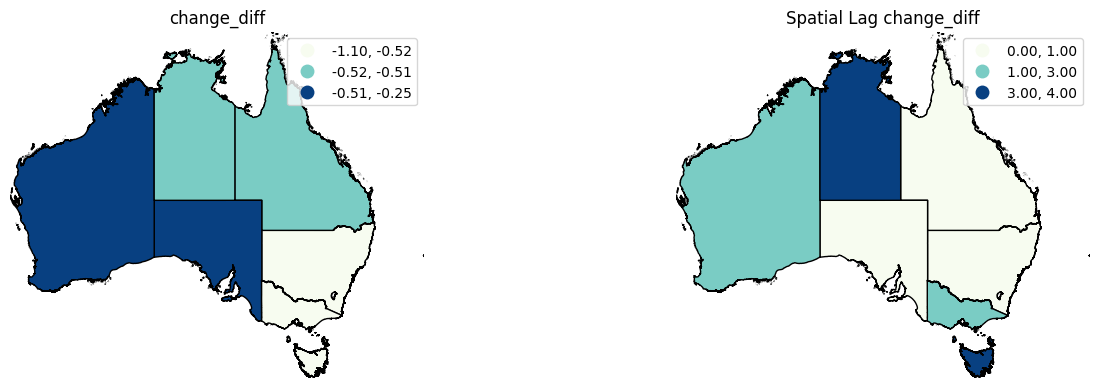

In [15]:
f,ax = plt.subplots(1,2,figsize=(3.5*4.5,4.5))
state_wages_2020_Q1['lag_in_change'] = ylagq5.yb


state_wages_2020_Q1.plot(column='change_diff', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=3, cmap='GnBu', legend=True)
ax[0].axis(state_wages_2020_Q1.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("change_diff")

state_wages_2020_Q1.plot(column='lag_in_change', ax=ax[1], edgecolor='k',
        scheme="quantiles",  k=3, cmap='GnBu', legend=True)
ax[1].axis(state_wages_2020_Q1.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag change_diff")

ax[0].axis('off')
ax[1].axis('off')
plt.show()

Global Spatial Autocorrelation

E:\Uni\research\venv\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

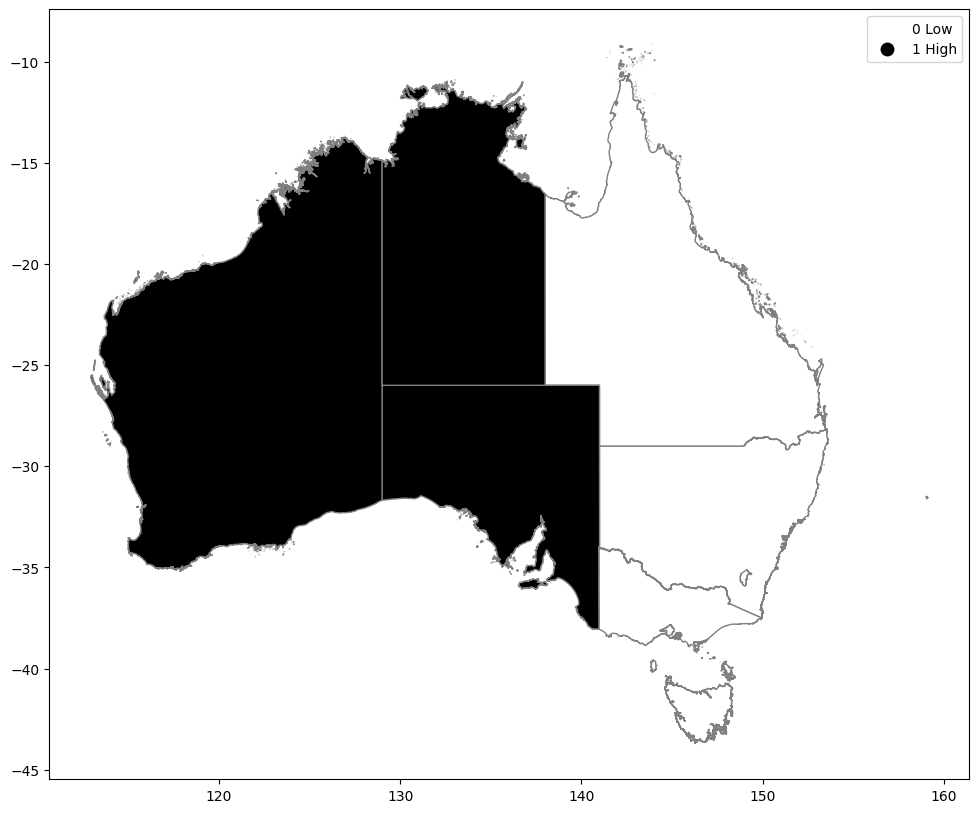

In [16]:
y = change_diff

y.median()
yb = y > y.median()
sum(yb)
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
state_wages_2020_Q1['yb'] = yb
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
state_wages_2020_Q1.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers


('WARNING: ', 5, ' is an island (no neighbors)')


E:\Uni\research\venv\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 5.
  warnings.warn(message)


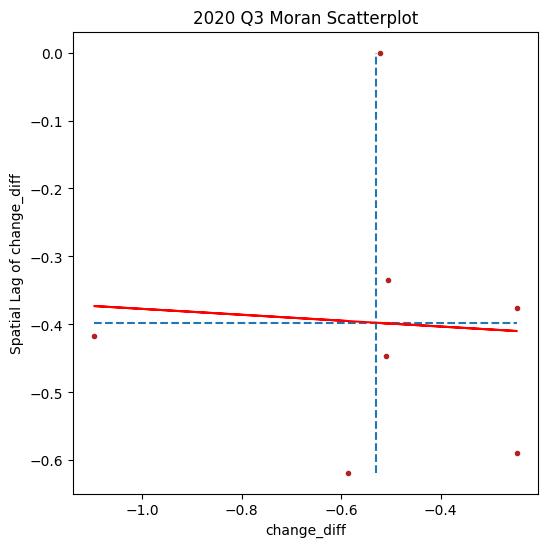

In [56]:
np.random.seed(12345)
import esda

wq =  lps.weights.Queen.from_dataframe(state_wages_2020_Q1)
wq.transform = 'r'

lag_change_diff = lps.weights.lag_spatial(wq, state_wages_2020_Q1['change_diff'])
lag_change_diff[np.isnan(lag_change_diff)] = 0

change_diff = state_wages_2020_Q1['change_diff']
b, a = np.polyfit(change_diff, lag_change_diff, 1)
f, ax = plt.subplots(1, figsize=(6, 6))

plt.plot(change_diff, lag_change_diff, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(change_diff.mean(), lag_change_diff.min(), lag_change_diff.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_change_diff.mean(), change_diff.min(), change_diff.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(change_diff, a + b*change_diff, 'r')
plt.title('2020 Q3 Moran Scatterplot')
plt.ylabel('Spatial Lag of change_diff')
plt.xlabel('change_diff')
plt.show()


('WARNING: ', 5, ' is an island (no neighbors)')


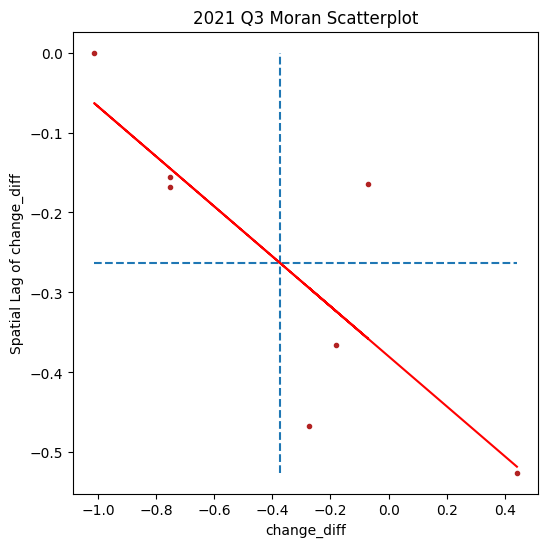

In [57]:
np.random.seed(12345)
import esda

wq =  lps.weights.Queen.from_dataframe(state_wages_2021_Q1)
wq.transform = 'r'

lag_change_diff = lps.weights.lag_spatial(wq, state_wages_2021_Q1['change_diff'])
lag_change_diff[np.isnan(lag_change_diff)] = 0

change_diff = state_wages_2021_Q1['change_diff']
b, a = np.polyfit(change_diff, lag_change_diff, 1)
f, ax = plt.subplots(1, figsize=(6, 6))

plt.plot(change_diff, lag_change_diff, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(change_diff.mean(), lag_change_diff.min(), lag_change_diff.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_change_diff.mean(), change_diff.min(), change_diff.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(change_diff, a + b*change_diff, 'r')
plt.title('2021 Q3 Moran Scatterplot')
plt.ylabel('Spatial Lag of change_diff')
plt.xlabel('change_diff')
plt.show()

('WARNING: ', 5, ' is an island (no neighbors)')


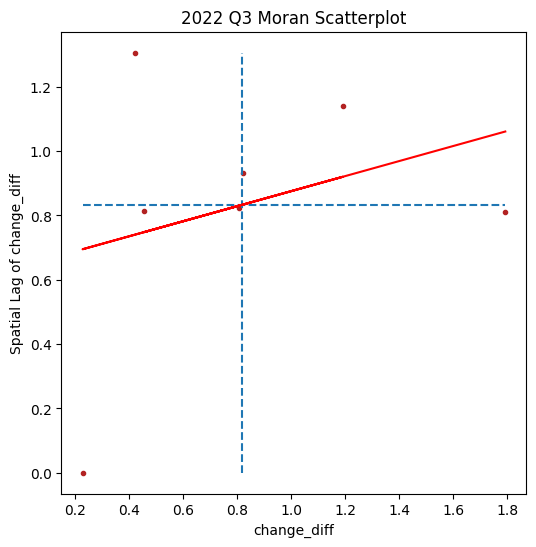

In [58]:
np.random.seed(12345)
import esda

wq =  lps.weights.Queen.from_dataframe(state_wages_2022_Q1)
wq.transform = 'r'

lag_change_diff = lps.weights.lag_spatial(wq, state_wages_2022_Q1['change_diff'])
lag_change_diff[np.isnan(lag_change_diff)] = 0

change_diff = state_wages_2022_Q1['change_diff']
b, a = np.polyfit(change_diff, lag_change_diff, 1)
f, ax = plt.subplots(1, figsize=(6, 6))

plt.plot(change_diff, lag_change_diff, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(change_diff.mean(), lag_change_diff.min(), lag_change_diff.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_change_diff.mean(), change_diff.min(), change_diff.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(change_diff, a + b*change_diff, 'r')
plt.title('2022 Q3 Moran Scatterplot')
plt.ylabel('Spatial Lag of change_diff')
plt.xlabel('change_diff')
plt.show()

In [ ]:
plt.plot(change_diff, a + b*change_diff, 'r')
plt.title('2019 Q3 Moran Scatterplot')
plt.ylabel('Spatial Lag of change_diff')
plt.xlabel('change_diff')
plt.show()


In [100]:
li = esda.moran.Moran_Local(change_diff, wq)
li.q

E:\Uni\research\venv\lib\site-packages\esda\moran.py:1057: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


array([1, 2, 1, 1, 1, 3, 2])

In [101]:
(li.p_sim < 0.05).sum()

2

E:\Uni\research\venv\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


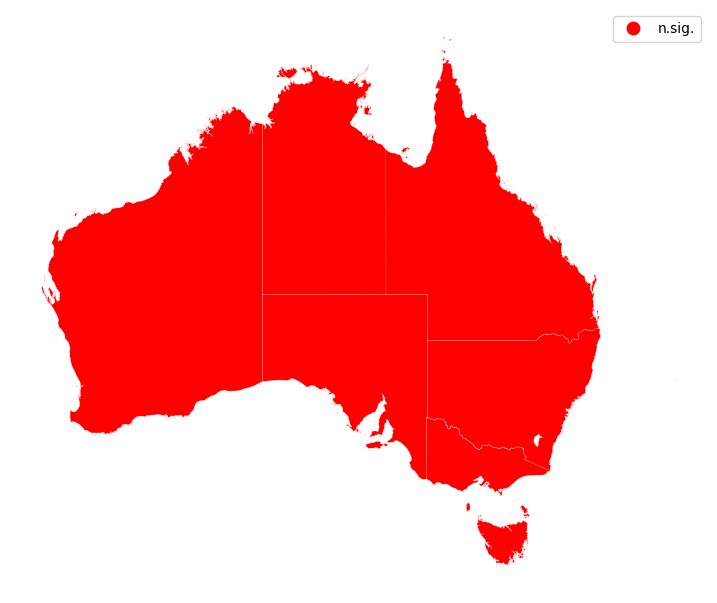

In [102]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

df = state_wages_2020_Q1
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()